In [56]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten, Activation
from keras import backend as K
import sklearn as sl
import keras
import numpy as np
import pickle

In [57]:
img_rows,img_cols = 28,28

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
pickle_off = open("trainX.pickle","rb")
x = pickle.load(pickle_off)

In [60]:
pickle_off = open("trainY.pickle","rb")
y = pickle.load(pickle_off)

In [61]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state =1)

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(45000, 28, 28)
(15000, 28, 28)
(45000,)
(15000,)


In [64]:
x_train = x_train.reshape(45000,784)


In [65]:
x_test = x_test.reshape(15000,784)

In [66]:
print(x_train[0])

[  0   0   0   0   0   0   1   0   0   0   0  63   0   0   0   0   0  22
  10   0   0   0   3   0   0   0   0   0   0   0   0   1   0   1   0   0
   0 113 226 247 216 185 147 146 207 235 210 136  15   0   0   2   0   0
   0   0   0   0   0   0   2   0   0 138 221 234 222 218 243 255 255 255
 255 223 218 235 223 172   0   0   4   0   0   0   0   0   0   2   0   0
 205 239 215 212 214 206 213 216 220 220 216 213 218 214 212 239 213   0
   0   0   0   0   0   0   0   0   0 163 236 208 215 216 217 215 215 215
 209 212 215 215 215 219 218 206 234 100   0   0   0   0   0   0   0   0
  47 234 215 215 215 215 214 214 215 214 215 216 216 215 215 215 217 215
 223 232   0   0   0   0   0   0   0   0 189 231 222 214 214 215 215 215
 215 215 214 215 216 216 216 218 217 218 219 238  78   0   0   0   0   0
   0   0 217 216 229 225 215 216 214 215 215 214 214 215 215 216 217 218
 217 221 225 230 194   0   0   0   0   0   0 130 235 209 225 233 211 214
 216 216 217 216 214 215 215 216 218 219 212 226 22

In [67]:
model = Sequential()

In [68]:
batch_size = 128
num_classes =10
epochs  = 10

In [69]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=225
x_test /=255
print('x_train shape' , x_train.shape)
print( x_train.shape[0],'X_train samples')
print( x_test.shape[0],'X_test samples')

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)


x_train shape (45000, 784)
45000 X_train samples
15000 X_test samples


In [70]:
model.add(Dense(500,input_dim=784),)
model.add(Activation('relu'))
model.add(Dense(300))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Acurracy:',score[1])

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 8s 188us/step - loss: 0.5969 - acc: 0.7885 - val_loss: 0.5111 - val_acc: 0.8126- acc: 0.7
Epoch 2/10
45000/45000 [==============================] - 8s 177us/step - loss: 0.4112 - acc: 0.8484 - val_loss: 0.4194 - val_acc: 0.8455
Epoch 3/10
45000/45000 [==============================] - 8s 176us/step - loss: 0.3663 - acc: 0.8654 - val_loss: 0.4251 - val_acc: 0.8513
Epoch 4/10
45000/45000 [==============================] - 8s 175us/step - loss: 0.3334 - acc: 0.8751 - val_loss: 0.3234 - val_acc: 0.8829
Epoch 5/10
45000/45000 [==============================] - 8s 172us/step - loss: 0.3111 - acc: 0.8850 - val_loss: 0.3298 - val_acc: 0.8785
Epoch 6/10
45000/45000 [==============================] - 8s 175us/step - loss: 0.2930 - acc: 0.8901 - val_loss: 0.3422 - val_acc: 0.8763
Epoch 7/10
45000/45000 [==============================] - 8s 174us/step - loss: 0.2780 - acc: 0.8960 - val_loss:

In [72]:
pickle_off = open("testX.pickle","rb")
x_test_final = pickle.load(pickle_off)

In [73]:
x_test_final.shape

(10000, 28, 28)

In [74]:
x_test_final = x_test_final.reshape(10000,784)

In [75]:
y_pred=model.predict(x_test_final)
predicted_class= []
for i in y_pred:
    predicted_class.append(np.argmax(i))  
predicted_class

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 6,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 9,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 2,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 0,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 0,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 2,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 6,
 1,
 2,
 5,
 1,
 6,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 6,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 0,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 0,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 6,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 2,
 2,
 4,


predicted class 6


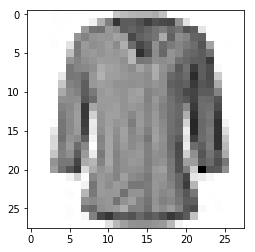

In [43]:
d = x_test_final[4]
d.shape=(28,28)
plt.imshow(255-d,cmap='gray')

print(f"predicted class {predicted_class[4]}")


In [44]:
outfile = open("predictions.pickle","wb")

In [45]:
pickle.dump(predicted_class,outfile)
outfile.close()